In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
df = pd.read_csv('/Users/macbook/Downloads/car_prices.csv')

In [3]:
#Data Cleaning

df = df.drop(columns=['vin', 'model' , 'trim' , 'state' , 'transmission' , 'make' , 'body' , 'color' , 'interior' , 'saledate' , 'seller'])



In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546976 entries, 0 to 558836
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          546976 non-null  int64  
 1   condition     546976 non-null  float64
 2   odometer      546976 non-null  float64
 3   mmr           546976 non-null  float64
 4   sellingprice  546976 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 25.0 MB


In [6]:
# Select features and scale the data

X = df[['year', 'odometer', 'mmr', 'sellingprice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)  # Explicit n_init set to 10
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

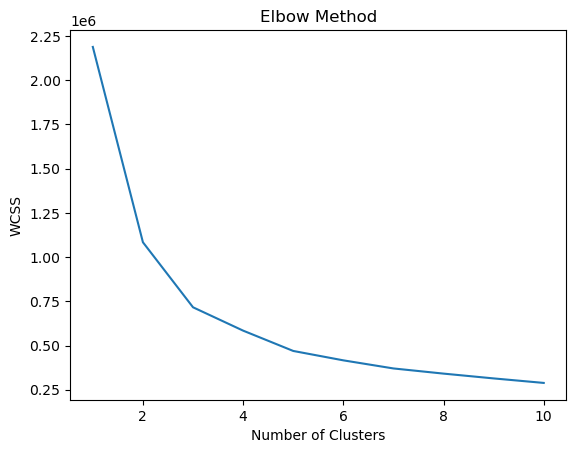

In [9]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
# Apply K-Means with the optimal number of clusters (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)  # Explicit n_init set to 10
y_kmeans = kmeans.fit_predict(X_scaled)

In [11]:
# Add cluster labels to the DataFrame
df['Cluster'] = y_kmeans

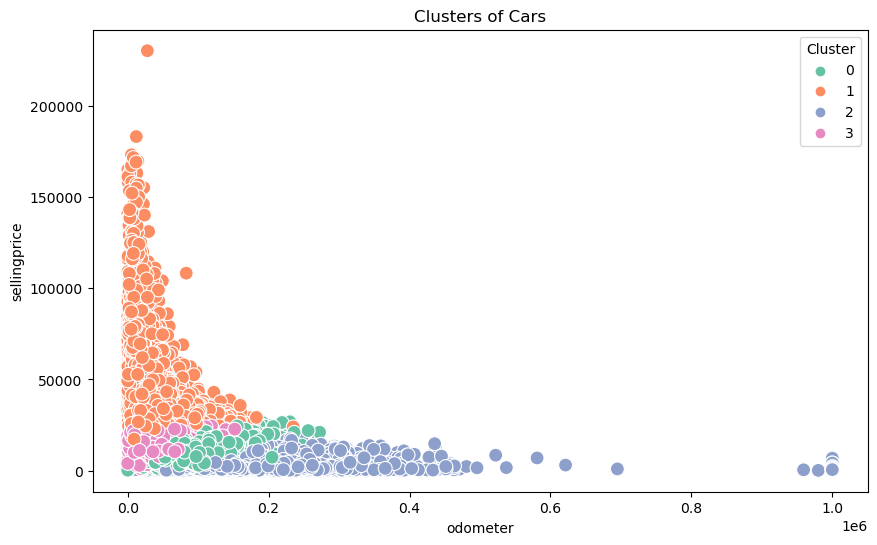

In [12]:
# Visualize the clusters (Mileage vs Price)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='sellingprice', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Clusters of Cars')
plt.xlabel('odometer')
plt.ylabel('sellingprice')
plt.show()


In [13]:
# Cluster summary: interpret the characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


                year  condition       odometer           mmr  sellingprice
Cluster                                                                   
0        2008.000543  27.958765   95591.359631   8266.297751   8105.274974
1        2012.743935  35.918927   29675.306569  31654.116434  31629.914804
2        2003.169473  20.716861  157322.762102   2999.867609   2857.087023
3        2012.550336  33.539963   36721.868028  15058.045638  14873.800857
